In [9]:
!pip install reverse_geocoder

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import reverse_geocoder as rg

import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

from my_functions import *  #feature_engineering_info, feature_engineering_basket, all_purchased_items
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
basket_df = pd.read_csv('customer_basket.csv')
info_df = pd.read_csv('customer_info.csv')

In [12]:
basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   invoice_id     100000 non-null  int64 
 1   list_of_goods  100000 non-null  object
 2   customer_id    100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [13]:
basket_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
invoice_id,100000.0,NaN,NaN,NaN,6124713.66375,3533207.950417,20054.0,3066431.5,6118618.0,9195346.75,12242220.0
list_of_goods,100000,98742,['oil'],33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,100000.0,NaN,NaN,NaN,16945.56902,9837.987201,1.0,8425.0,16917.0,25536.0,34060.0


In [14]:
basket_df.head()

,invoice_id,list_of_goods,customer_id
0,5062209,"['megaman zero 3', 'energy bar', 'pokemon viol...",4925
1,4272512,"['black beer', 'bramble', 'laptop', 'pokemon v...",19046
2,7121052,"['soup', 'shallot', 'cake', 'fresh bread', 'cr...",10318
3,5847748,"['soup', 'cooking oil', 'cereals', 'oil', 'dog...",27283
4,6336114,"['eggplant', 'mint green tea', 'oil', 'bacon',...",16072


In [15]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34060 entries, 0 to 34059
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               34060 non-null  int64  
 1   customer_id                              34060 non-null  int64  
 2   customer_name                            34060 non-null  object 
 3   customer_gender                          34060 non-null  object 
 4   customer_birthdate                       33719 non-null  object 
 5   kids_home                                33311 non-null  float64
 6   teens_home                               33277 non-null  float64
 7   number_complaints                        33038 non-null  float64
 8   distinct_stores_visited                  33379 non-null  float64
 9   lifetime_spend_groceries                 34060 non-null  float64
 10  lifetime_spend_electronics               34060

In [16]:
info_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,34060.0,NaN,NaN,NaN,17029.5,9832.419421,0.0,8514.75,17029.5,25544.25,34059.0
customer_id,34060.0,NaN,NaN,NaN,20010.854433,11557.889072,1.0,10018.75,19985.5,30042.25,40000.0
customer_name,34060,33579,Robert Brown,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_gender,34060,2,male,17133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_birthdate,33719,33710,02/04/1989 04:33 PM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kids_home,33311.0,NaN,NaN,NaN,1.170244,1.307319,0.0,0.0,1.0,1.0,10.0
teens_home,33277.0,NaN,NaN,NaN,0.936292,0.759579,0.0,0.0,1.0,1.0,4.0
number_complaints,33038.0,NaN,NaN,NaN,0.832042,0.771205,0.0,0.0,1.0,1.0,4.0
distinct_stores_visited,33379.0,NaN,NaN,NaN,2.914078,1.549081,1.0,2.0,3.0,4.0,10.0
lifetime_spend_groceries,34060.0,NaN,NaN,NaN,22818.404698,20098.763199,0.0,9346.0,15877.5,30428.25,158544.0


In [17]:
info_df.head()

,Unnamed: 0,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,0,29930,April Clark,female,01/15/1972 02:27 PM,2.0,2.0,1.0,4.0,7789.0,...,1894.0,457.0,412.0,428.0,386.0,0.158741,2018.0,NaN,38.721807,-9.125534
1,1,6813,Bsc. Paul Ketchum,male,07/31/1944 10:53 AM,0.0,1.0,0.0,4.0,8653.0,...,346.0,394.0,75.0,226.0,73.0,1.227890,2013.0,971840.0,38.734668,-9.163533
2,2,39451,Mary Downing,female,11/13/1989 02:11 PM,2.0,3.0,0.0,7.0,15605.0,...,1971.0,920.0,335.0,192.0,319.0,0.101598,2011.0,NaN,38.787126,-9.147077
3,3,21557,Manuel Kueny,male,08/09/1976 06:23 AM,0.0,0.0,1.0,1.0,13440.0,...,785.0,139.0,679.0,270.0,221.0,0.259943,2009.0,NaN,38.741816,-9.159700
4,4,16415,Phd. Curtis Tharp,male,07/11/1966 08:12 AM,1.0,1.0,1.0,5.0,49250.0,...,1492.0,1046.0,112.0,144.0,244.0,0.317822,2012.0,925367.0,38.785921,-9.149221


In [18]:
# Percentage of missing values in each column
for col in info_df.columns:
    pct_missing = np.mean(info_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
customer_id - 0%
customer_name - 0%
customer_gender - 0%
customer_birthdate - 1%
kids_home - 2%
teens_home - 2%
number_complaints - 3%
distinct_stores_visited - 2%
lifetime_spend_groceries - 0%
lifetime_spend_electronics - 0%
typical_hour - 4%
lifetime_spend_vegetables - 3%
lifetime_spend_nonalcohol_drinks - 0%
lifetime_spend_alcohol_drinks - 2%
lifetime_spend_meat - 0%
lifetime_spend_fish - 5%
lifetime_spend_hygiene - 0%
lifetime_spend_videogames - 0%
lifetime_spend_petfood - 0%
lifetime_total_distinct_products - 0%
percentage_of_products_bought_promotion - 0%
year_first_transaction - 0%
loyalty_card_number - 32%
latitude - 0%
longitude - 0%


In [19]:
# Percentage of missing values in each column
for col in basket_df.columns:
    pct_missing = np.mean(basket_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

invoice_id - 0%
list_of_goods - 0%
customer_id - 0%


In [20]:
# Get all new features for info_df
feature_engineering_info(info_df)

Loading formatted geocoded file...


In [21]:
# Get all new features for basket_df
feature_engineering_basket(basket_df)

In [22]:
# Get a full list of all items purchased for each customer (with repetitions)
all_items = all_purchased_items(basket_df)

In [23]:
all_items.head()

,customer_id,all_purchased_items
0,1,"[pickles, protein bar, mashed potato, beer, tu..."
1,2,"[shampoo, tooth brush, portal, vegetables mix,..."
2,4,"[shallot, mashed potato, olive oil, asparagus,..."
3,5,"[candy bars, zucchini, mint green tea, strong ..."
4,6,"[candy bars, gadget for tiktok streaming, port..."


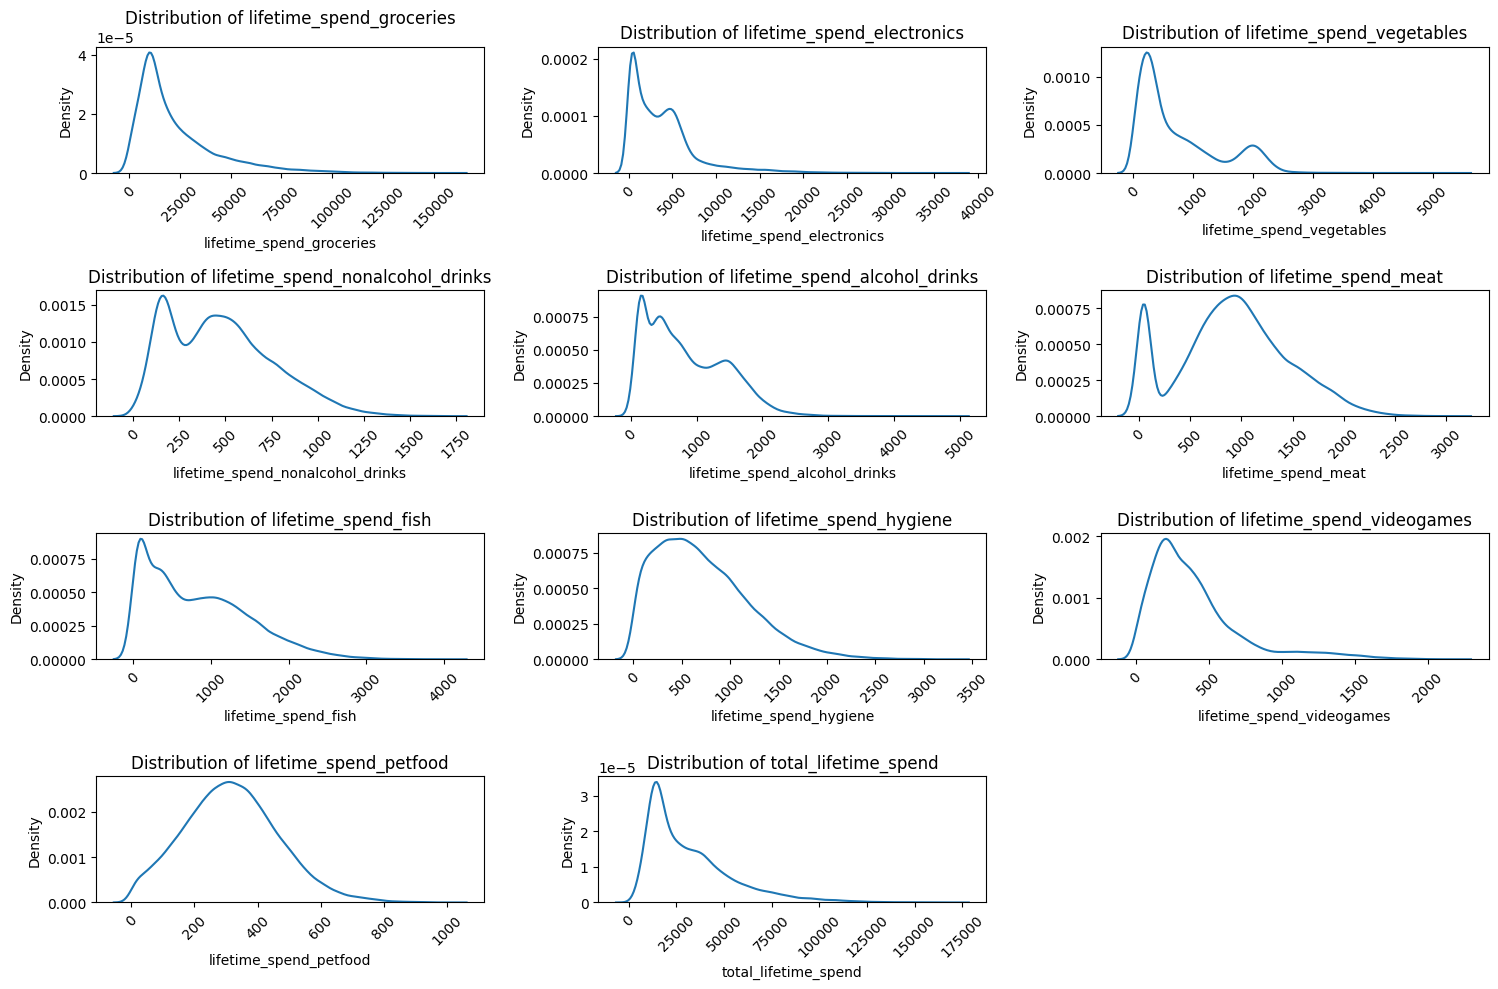

In [24]:
# Get columns with lifetime spend data
spend_columns = [col for col in info_df.columns if 'lifetime_spend' in col]  

# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(spend_columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(spend_columns):
    sns.kdeplot(data=info_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(spend_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

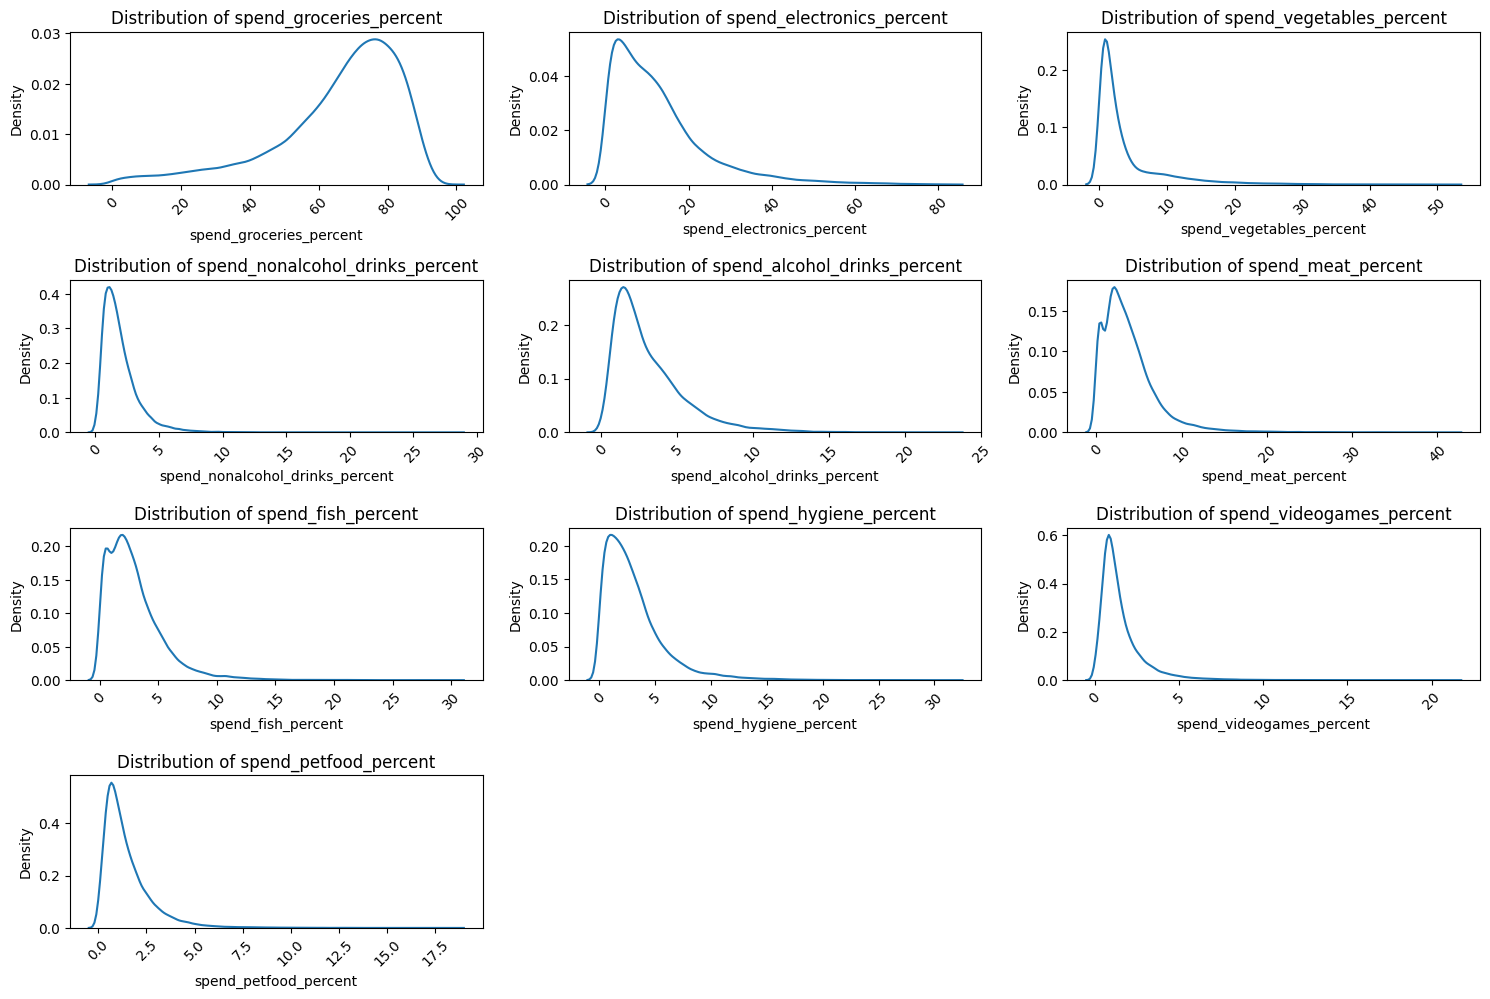

In [25]:
# Get columns with percent spend data for each category
spend_columns = [col for col in info_df.columns if '_percent' in col]

# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(spend_columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(spend_columns):
    sns.kdeplot(data=info_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(spend_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

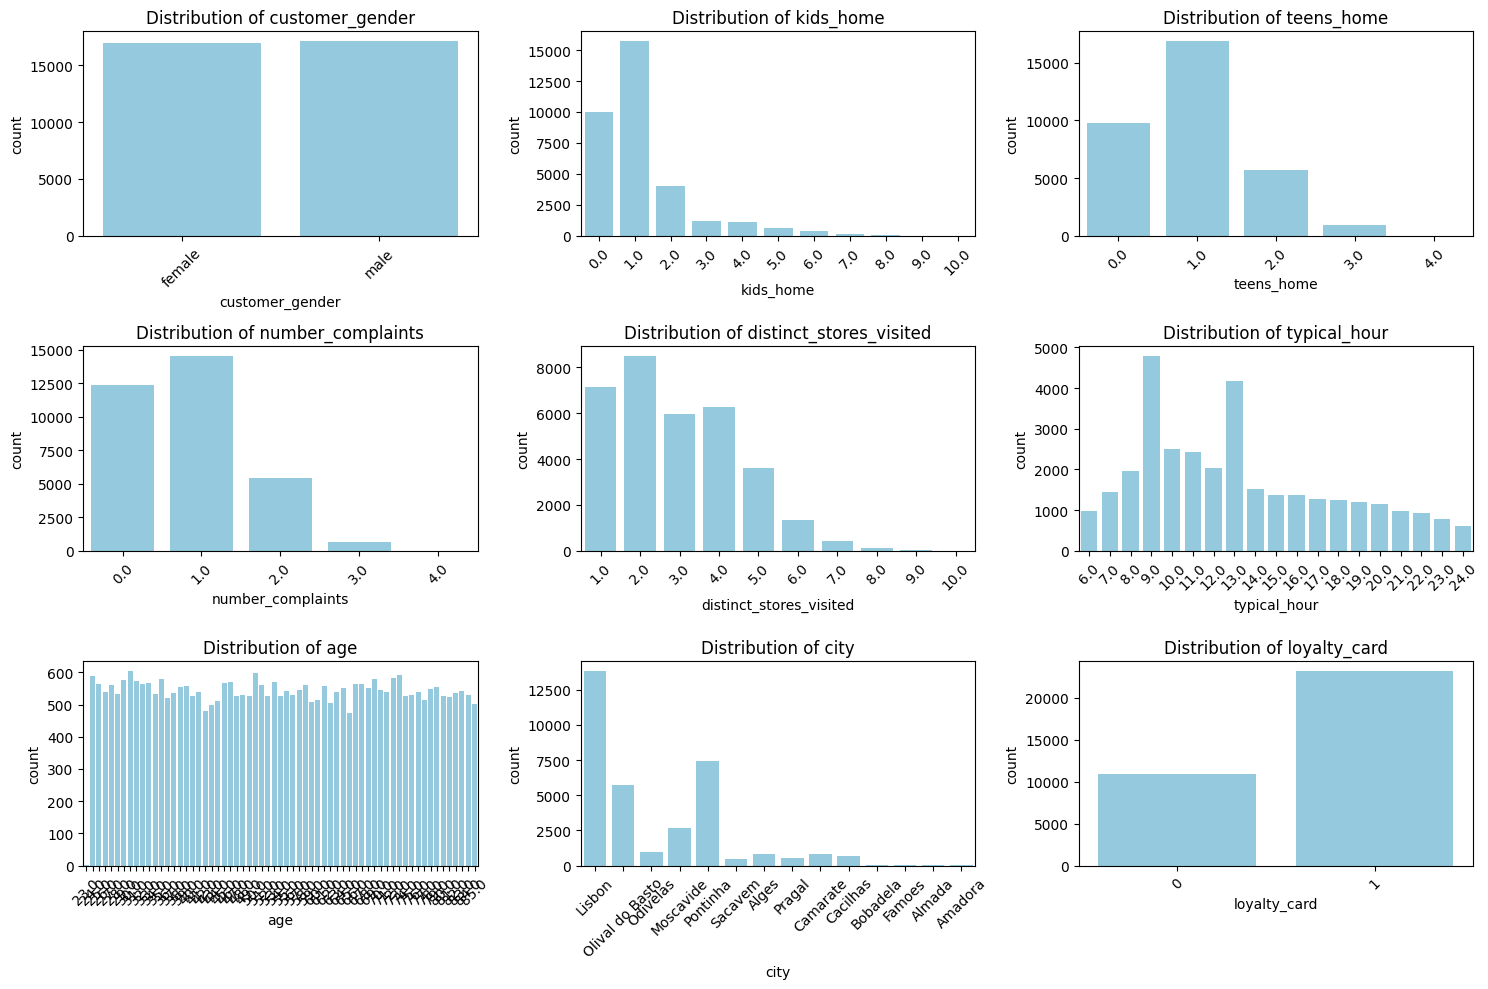

In [26]:
# Define the columns to plot
columns = ['customer_gender', 'kids_home', 'teens_home', 'number_complaints', 
           'distinct_stores_visited', 'typical_hour', 'age', 'city', 'loyalty_card']

# Create a grid of subplots
n_cols = 3  # Number of columns in the grid
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in a subplot
for i, col in enumerate(columns):
    sns.countplot(data=info_df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

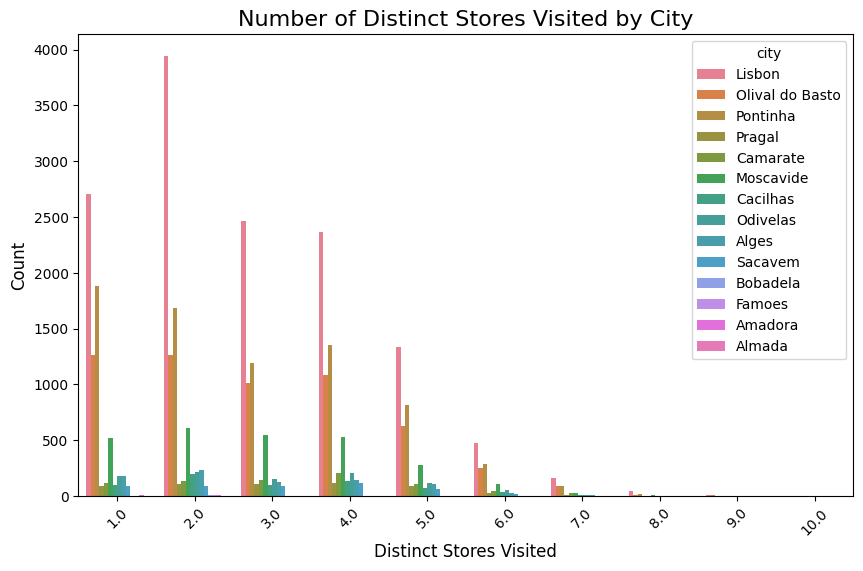

In [27]:
# Adjust the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(data=info_df, x='distinct_stores_visited', hue='city')#, palette='viridis')

# Add a title and labels
plt.title('Number of Distinct Stores Visited by City', fontsize=16)
plt.xlabel('Distinct Stores Visited', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

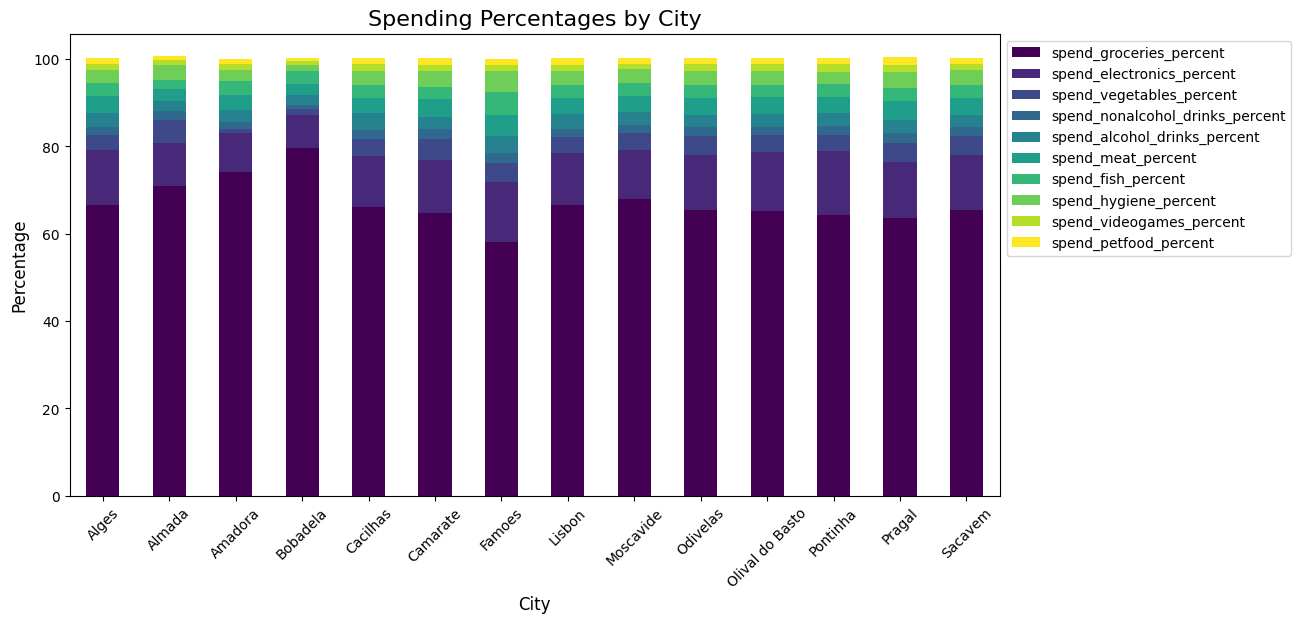

In [28]:
spending_percent_columns = [
    'spend_groceries_percent', 'spend_electronics_percent', 'spend_vegetables_percent',
    'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent', 'spend_meat_percent',
    'spend_fish_percent', 'spend_hygiene_percent', 'spend_videogames_percent', 'spend_petfood_percent'
]
city_spending = info_df.groupby('city')[spending_percent_columns].mean()

city_spending.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Spending Percentages by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

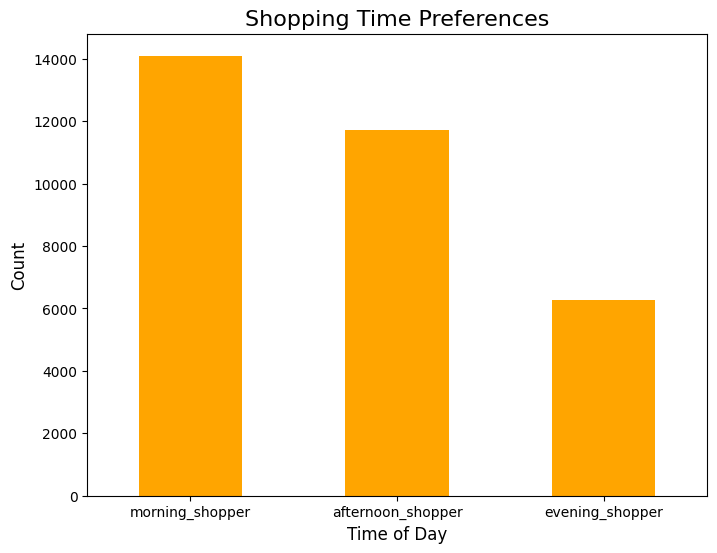

In [29]:
time_columns = ['morning_shopper', 'afternoon_shopper', 'evening_shopper']
time_preferences = info_df[time_columns].sum()

plt.figure(figsize=(8, 6))
time_preferences.plot(kind='bar', color='orange')
plt.title('Shopping Time Preferences', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

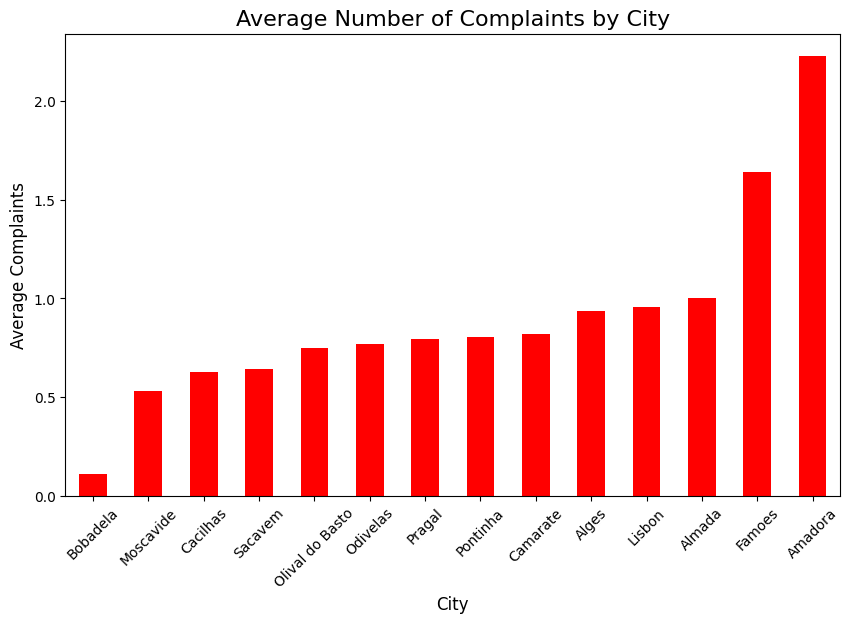

In [30]:
plt.figure(figsize=(10, 6))
info_df.groupby('city')['number_complaints'].mean().sort_values().plot(kind='bar', color='red')
plt.title('Average Number of Complaints by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Complaints', fontsize=12)
plt.xticks(rotation=45)
plt.show()

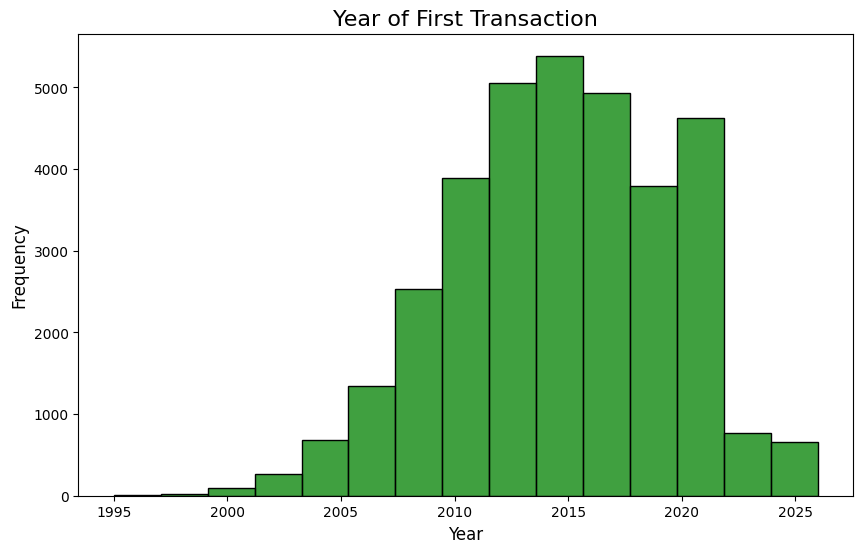

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=info_df, x='year_first_transaction', bins=15, kde=False, color='green')
plt.title('Year of First Transaction', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [32]:
info_df.columns

Index(['customer_id', 'customer_name', 'customer_gender', 'kids_home',
       'teens_home', 'number_complaints', 'distinct_stores_visited',
       'lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'age', 'morning_shopper', 'afternoon_shopper', 'evening_shopper',
       'city', 'total_lifetime_spend', 'spend_groceries_percent',
       'spend_electronics_percent', 'spend_vegetables_percent',
       'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent',
       'spend_meat_percent', 'spend_fish_percent', 'spend_hygiene_percent',
       'spend_videogames_percent', 'spend_petfood_perc

In [41]:
# Perform KNN imputation
imputed_data = knn_imputer.fit_transform(info_df[numeric_columns])

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns)

# Add back non-numeric columns
for col in info_df.columns:
    if col not in numeric_columns:
        imputed_df[col] = info_df[col].values

# Display the first few rows of the imputed DataFrame
imputed_df.head()

,customer_id,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,spend_meat_percent,spend_fish_percent,spend_hygiene_percent,spend_videogames_percent,spend_petfood_percent,loyalty_card,total_children,customer_name,customer_gender,city
0,29930.0,2.0,2.0,1.0,4.0,7789.0,5601.0,13.0,726.0,962.0,...,7.580645,8.984820,2.167932,1.954459,2.030361,0.0,4.0,April Clark,female,Lisbon
1,6813.0,0.0,1.0,0.0,4.0,8653.0,35.0,14.0,792.0,102.0,...,6.461458,3.017091,3.435647,0.653994,1.970701,1.0,1.0,Bsc. Paul Ketchum,male,Lisbon
2,39451.0,2.0,3.0,0.0,7.0,15605.0,4275.0,14.0,1585.0,980.0,...,4.552963,6.782986,3.166082,1.152867,0.660747,0.0,5.0,Mary Downing,female,Olival do Basto
3,21557.0,0.0,0.0,1.0,1.0,13440.0,16366.0,14.0,28.0,269.0,...,2.700604,2.257693,0.399770,1.952833,0.776531,0.0,0.0,Manuel Kueny,male,Lisbon
4,16415.0,1.0,1.0,1.0,5.0,49250.0,3197.0,14.0,258.0,726.0,...,1.702017,2.583326,1.811099,0.193923,0.249329,1.0,2.0,Phd. Curtis Tharp,male,Olival do Basto


In [42]:
imputed_df.isna().sum()

customer_id                                0
kids_home                                  0
teens_home                                 0
number_complaints                          0
distinct_stores_visited                    0
lifetime_spend_groceries                   0
lifetime_spend_electronics                 0
typical_hour                               0
lifetime_spend_vegetables                  0
lifetime_spend_nonalcohol_drinks           0
lifetime_spend_alcohol_drinks              0
lifetime_spend_meat                        0
lifetime_spend_fish                        0
lifetime_spend_hygiene                     0
lifetime_spend_videogames                  0
lifetime_spend_petfood                     0
lifetime_total_distinct_products           0
percentage_of_products_bought_promotion    0
year_first_transaction                     0
age                                        0
morning_shopper                            0
afternoon_shopper                          0
evening_sh

In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the imputed data
standardized_data = scaler.fit_transform(imputed_df[numeric_columns])

# Convert the standardized data back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=numeric_columns)

# Display the first few rows of the standardized DataFrame
standardized_df.head()

,customer_id,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,spend_vegetables_percent,spend_nonalcohol_drinks_percent,spend_alcohol_drinks_percent,spend_meat_percent,spend_fish_percent,spend_hygiene_percent,spend_videogames_percent,spend_petfood_percent,loyalty_card,total_children
0,0.858227,0.637555,1.406338,0.220293,0.704806,-0.747789,0.462634,-0.042544,-0.013680,1.714174,...,-0.061454,1.867148,1.105308,1.167301,2.504460,-0.337489,0.301446,0.402467,-1.456873,1.060485
1,-1.141908,-0.900778,0.082830,-1.089892,0.704806,-0.704800,-0.979972,0.174287,0.084226,-1.334084,...,0.599752,-0.741419,-0.937517,0.822716,0.033829,0.122030,-0.648529,0.357423,0.686402,-0.623876
2,1.682005,0.637555,2.729845,-1.089892,2.653511,-0.358903,0.118959,0.174287,1.260581,1.777975,...,0.322530,1.021559,1.395258,0.235113,1.592904,0.024318,-0.284108,-0.631614,-1.456873,1.621939
3,0.133776,-0.900778,-1.240678,0.220293,-1.243898,-0.466623,3.252725,0.174287,-1.049109,-0.742154,...,-0.703817,-0.823618,0.928642,-0.335207,-0.280560,-0.978408,0.300258,-0.544195,-1.456873,-1.185330
4,-0.311121,-0.131612,0.082830,0.220293,1.354375,1.315105,-0.160439,0.174287,-0.707922,0.877675,...,-0.633883,-0.480428,-0.920562,-0.642661,-0.145749,-0.466833,-0.984606,-0.942242,0.686402,-0.062423


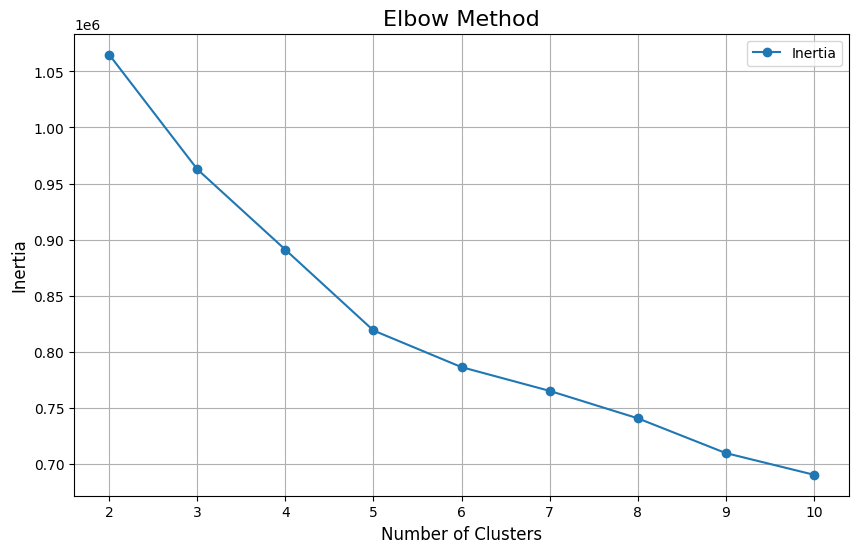

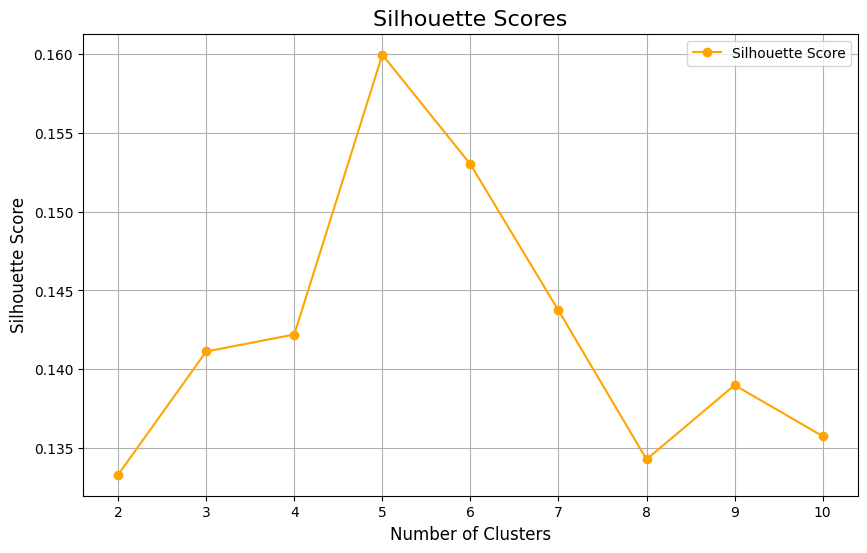

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# Elbow Method
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Test clusters from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(standardized_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(standardized_data, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.title('Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Perform hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical_clustering.fit_predict(standardized_data)

# Calculate silhouette score for hierarchical clustering
hierarchical_silhouette = silhouette_score(standardized_data, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette}")

# Perform non-hierarchical clustering (KMeans)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(standardized_data)

# Calculate silhouette score for KMeans clustering
kmeans_silhouette = silhouette_score(standardized_data, kmeans_labels)
print(f"Silhouette Score for KMeans Clustering: {kmeans_silhouette}")

Silhouette Score for Hierarchical Clustering: 0.14632610148748124
Silhouette Score for KMeans Clustering: 0.15993864694063142


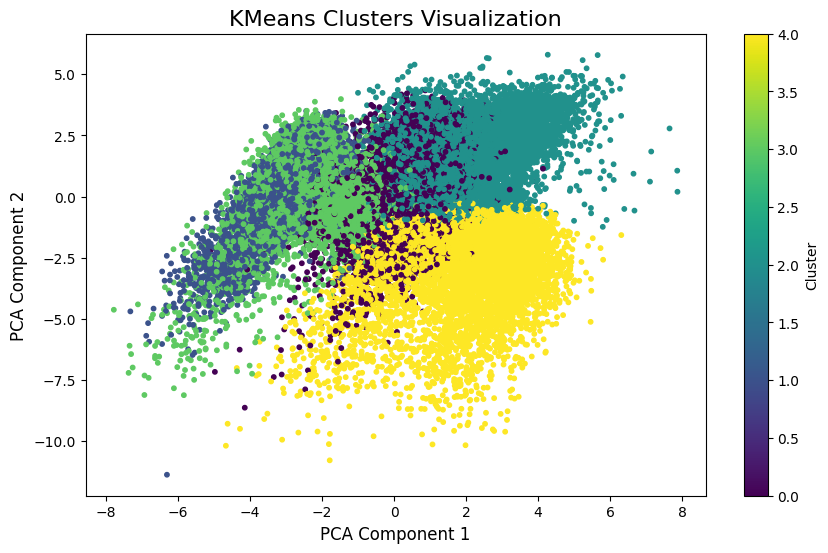

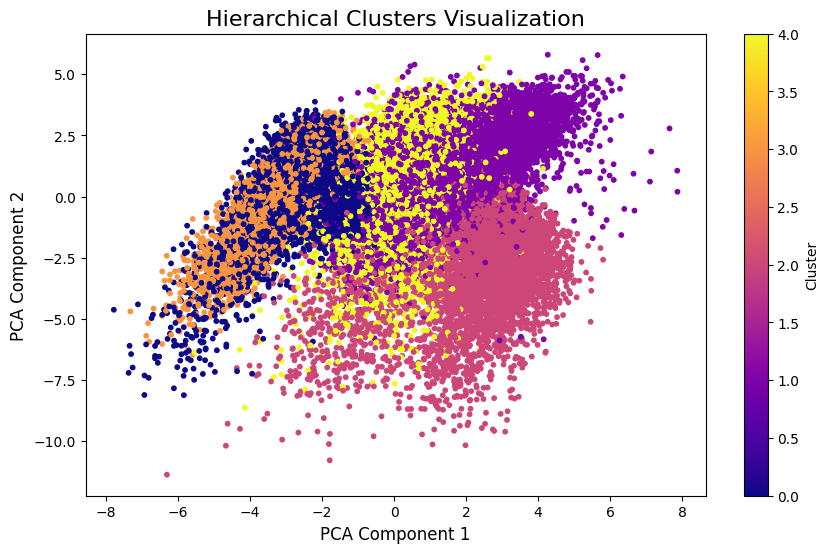

In [45]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(standardized_data)

# Create a scatter plot for KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans Clusters Visualization', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

# Create a scatter plot for Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hierarchical_labels, cmap='plasma', s=10)
plt.title('Hierarchical Clusters Visualization', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

In [47]:
# Add cluster labels to the standardized DataFrame
standardized_df['Cluster'] = kmeans_labels

# Calculate the mean of each feature for each cluster
cluster_summary = standardized_df.groupby('Cluster').mean()

# Display the cluster summary
print(cluster_summary)

# Example: Naming clusters based on characteristics
# You can analyze the cluster_summary to assign meaningful names to clusters
# For instance:
# Cluster 0: "High Spenders"
# Cluster 1: "Budget Shoppers"
# Cluster 2: "Tech Enthusiasts"
# Cluster 3: "Grocery Focused"
# Cluster 4: "Balanced Shoppers"

         customer_id  kids_home  teens_home  number_complaints  \
Cluster                                                          
0           0.015442  -0.683045   -0.914608          -0.057814   
1           0.024287  -0.136339   -0.840372          -0.150447   
2          -0.013544  -0.331924   -0.029512          -0.312568   
3           0.007724  -0.190527    0.026385           0.390970   
4          -0.018798   1.204662    1.158104           0.032457   

         distinct_stores_visited  lifetime_spend_groceries  \
Cluster                                                      
0                      -0.925110                 -0.172298   
1                       0.161941                 -0.612374   
2                      -0.029880                  1.250175   
3                       0.279518                 -0.611137   
4                       0.193142                 -0.286313   

         lifetime_spend_electronics  typical_hour  lifetime_spend_vegetables  \
Cluster               

In [50]:
standardized_df.columns

Index(['customer_id', 'kids_home', 'teens_home', 'number_complaints',
       'distinct_stores_visited', 'lifetime_spend_groceries',
       'lifetime_spend_electronics', 'typical_hour',
       'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks',
       'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat',
       'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'age', 'morning_shopper', 'afternoon_shopper', 'evening_shopper',
       'total_lifetime_spend', 'spend_groceries_percent',
       'spend_electronics_percent', 'spend_vegetables_percent',
       'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent',
       'spend_meat_percent', 'spend_fish_percent', 'spend_hygiene_percent',
       'spend_videogames_percent', 'spend_petfood_percent', 'loyalty_card',
       'total_children

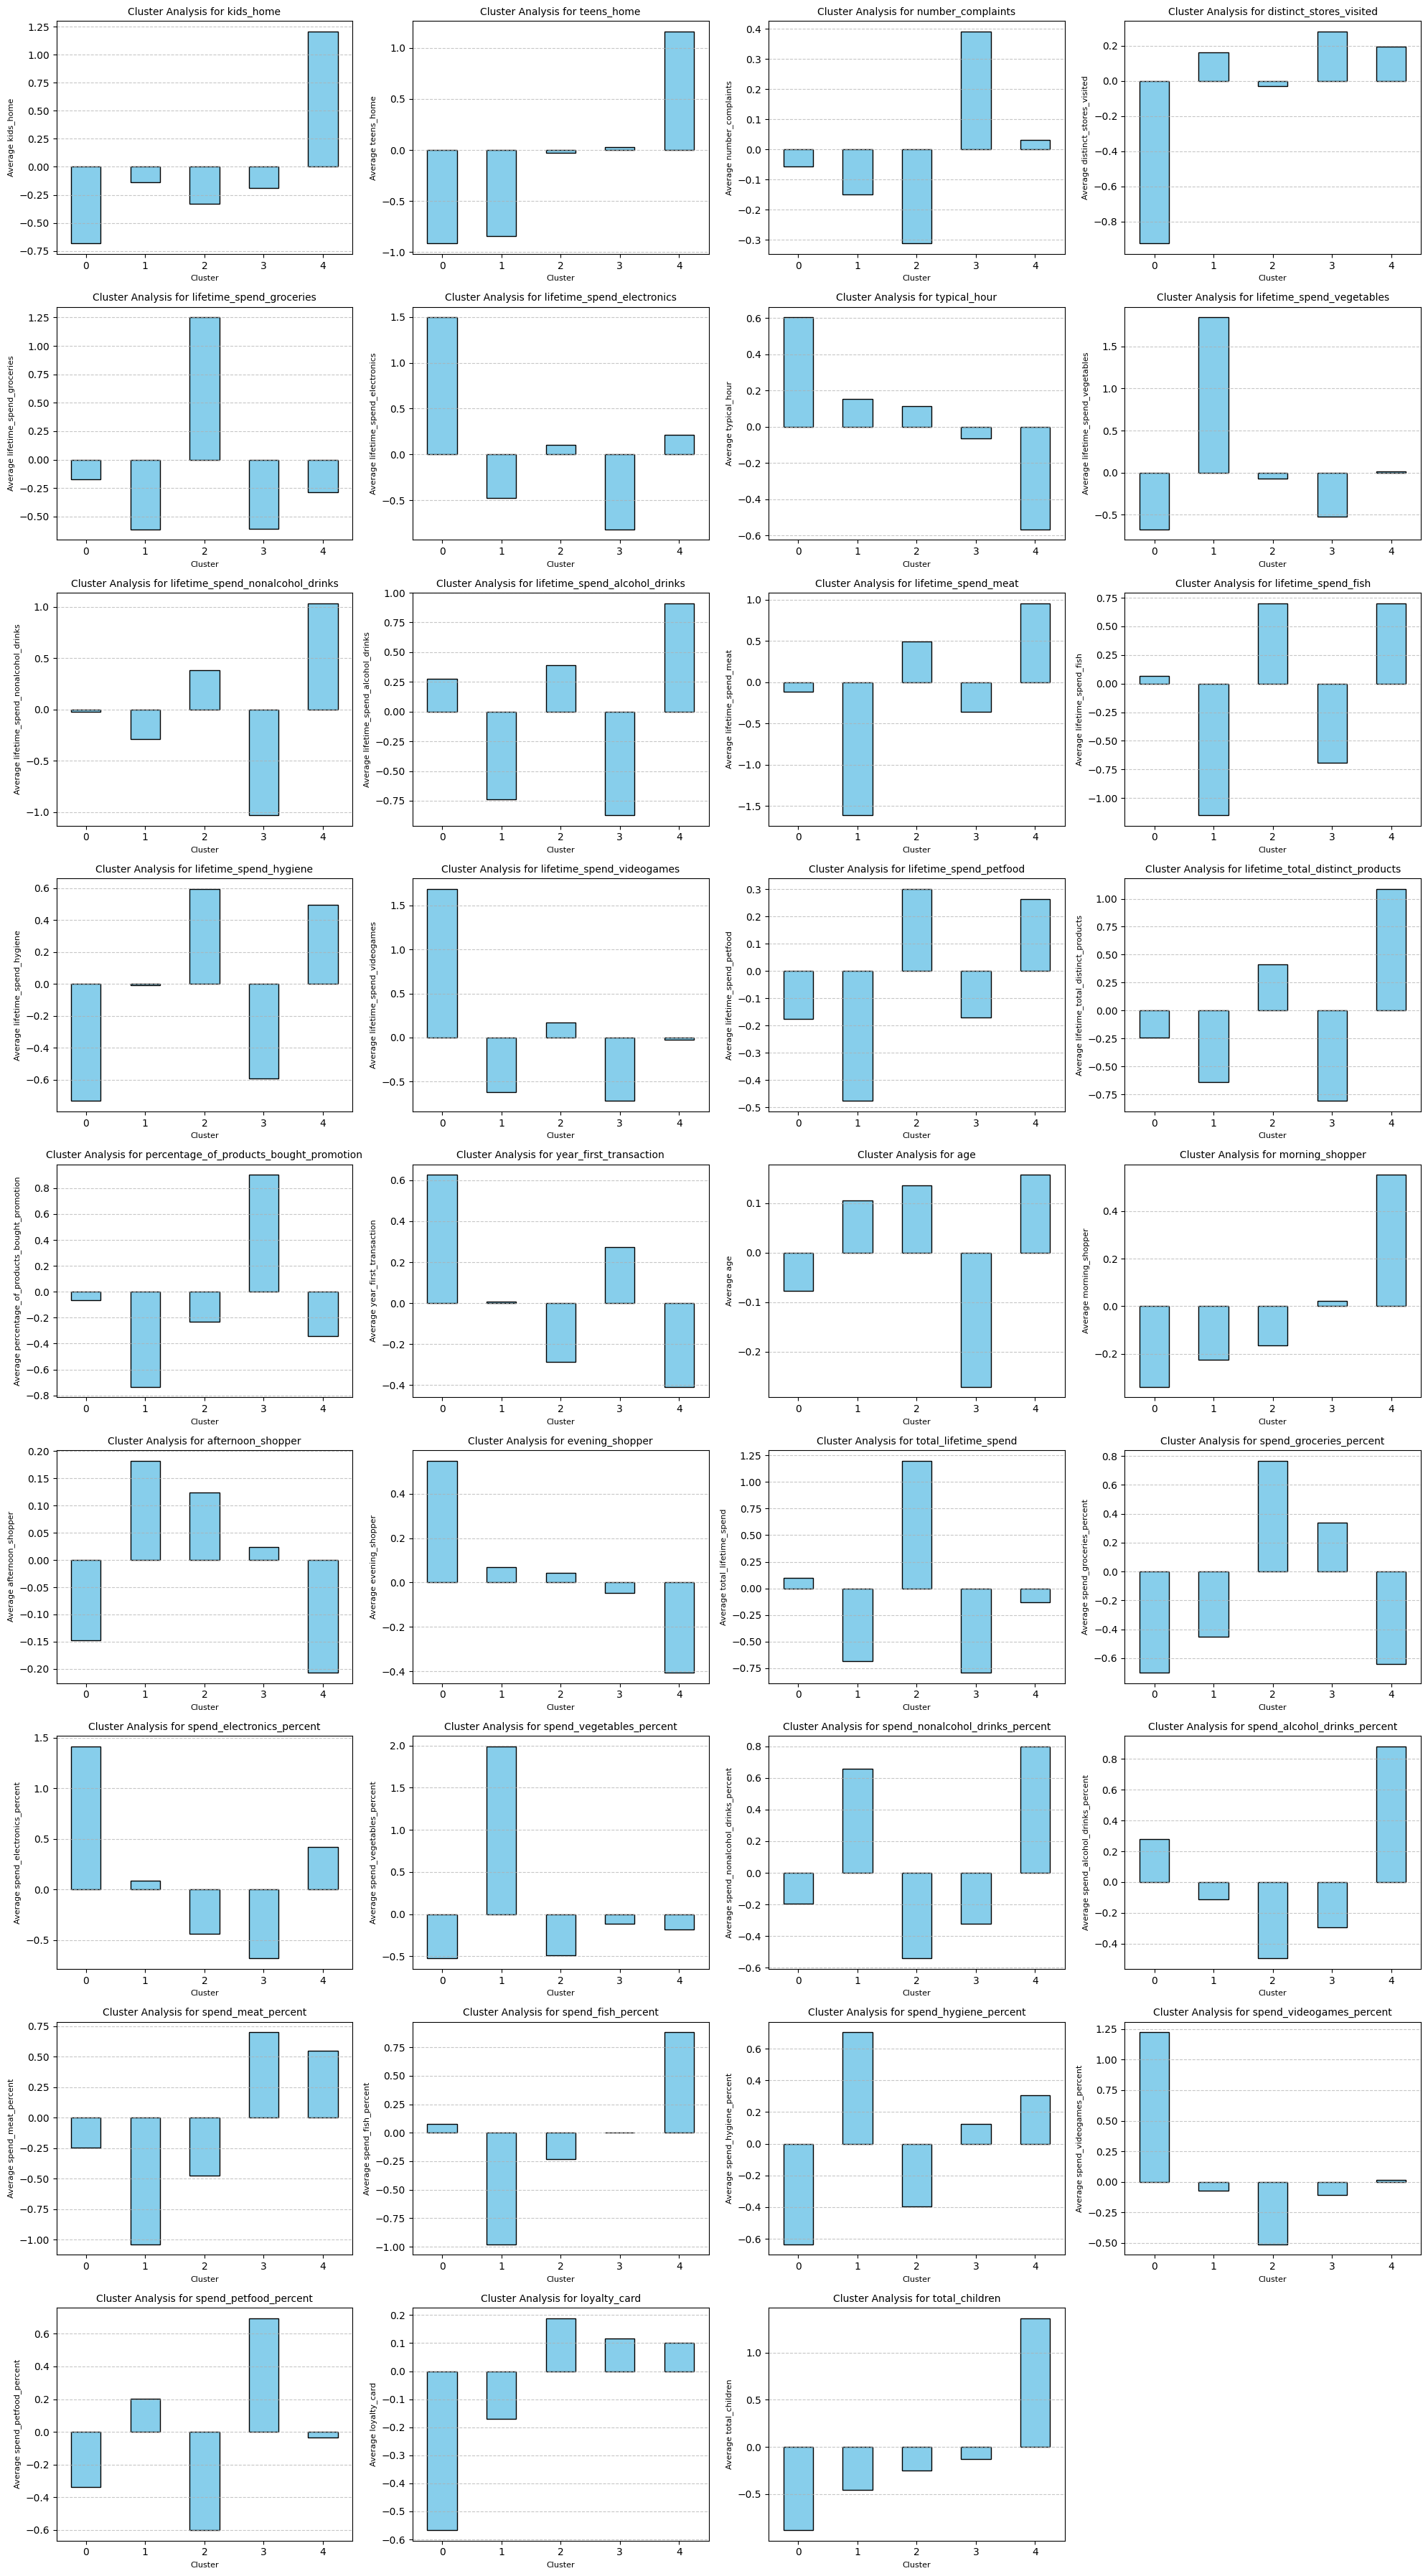

In [57]:
# Define the features to analyze
features_to_analyze = [
    'kids_home', 'teens_home', 'number_complaints', 'distinct_stores_visited',
    'lifetime_spend_groceries', 'lifetime_spend_electronics', 'typical_hour',
    'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks',
    'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat', 'lifetime_spend_fish',
    'lifetime_spend_hygiene', 'lifetime_spend_videogames', 'lifetime_spend_petfood',
    'lifetime_total_distinct_products', 'percentage_of_products_bought_promotion',
    'year_first_transaction', 'age', 'morning_shopper', 'afternoon_shopper',
    'evening_shopper', 'total_lifetime_spend', 'spend_groceries_percent',
    'spend_electronics_percent', 'spend_vegetables_percent',
    'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent',
    'spend_meat_percent', 'spend_fish_percent', 'spend_hygiene_percent',
    'spend_videogames_percent', 'spend_petfood_percent', 'loyalty_card',
    'total_children'
]

# Set up the grid
n_cols = 4  # Number of columns in the grid
n_rows = (len(features_to_analyze) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create bar charts for each feature
for i, feature in enumerate(features_to_analyze):
    cluster_analysis[feature].plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Cluster Analysis for {feature}', fontsize=10)
    axes[i].set_xlabel('Cluster', fontsize=8)
    axes[i].set_ylabel(f'Average {feature}', fontsize=8)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any unused subplots
for j in range(len(features_to_analyze), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [60]:
standardized_df

,customer_id,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,spend_nonalcohol_drinks_percent,spend_alcohol_drinks_percent,spend_meat_percent,spend_fish_percent,spend_hygiene_percent,spend_videogames_percent,spend_petfood_percent,loyalty_card,total_children,Cluster
0,0.858227,0.637555,1.406338,0.220293,0.704806,-0.747789,0.462634,-0.042544,-0.013680,1.714174,...,1.867148,1.105308,1.167301,2.504460,-0.337489,0.301446,0.402467,-1.456873,1.060485,4
1,-1.141908,-0.900778,0.082830,-1.089892,0.704806,-0.704800,-0.979972,0.174287,0.084226,-1.334084,...,-0.741419,-0.937517,0.822716,0.033829,0.122030,-0.648529,0.357423,0.686402,-0.623876,3
2,1.682005,0.637555,2.729845,-1.089892,2.653511,-0.358903,0.118959,0.174287,1.260581,1.777975,...,1.021559,1.395258,0.235113,1.592904,0.024318,-0.284108,-0.631614,-1.456873,1.621939,4
3,0.133776,-0.900778,-1.240678,0.220293,-1.243898,-0.466623,3.252725,0.174287,-1.049109,-0.742154,...,-0.823618,0.928642,-0.335207,-0.280560,-0.978408,0.300258,-0.544195,-1.456873,-1.185330,0
4,-0.311121,-0.131612,0.082830,0.220293,1.354375,1.315105,-0.160439,0.174287,-0.707922,0.877675,...,-0.480428,-0.920562,-0.642661,-0.145749,-0.466833,-0.984606,-0.942242,0.686402,-0.062423,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.476082,-0.131612,0.082830,-1.089892,-0.594330,1.965453,0.371661,0.607947,0.115378,0.175867,...,-0.869684,-0.457552,-0.882754,-0.277709,-0.613380,-0.754622,-0.869003,-1.456873,-0.062423,2
34056,0.641229,-0.131612,0.082830,-1.089892,0.055238,-0.335071,-0.005189,-0.042544,-0.345967,0.955654,...,0.740965,-0.155543,0.303937,-0.279243,0.245913,-0.361552,-0.171805,0.686402,-0.062423,2
34057,1.689706,-0.131612,-1.240678,0.220293,-0.594330,-0.407365,1.287609,0.824777,-0.494309,-0.766966,...,-0.704405,-0.586675,-0.603495,0.974817,-0.643937,0.984398,-0.832021,-1.456873,-0.623876,0
34058,-0.142230,-0.131612,0.082830,0.220293,0.704806,0.726503,0.229629,-0.909864,-0.801378,0.023454,...,-0.637159,-0.821715,-0.356875,-0.415587,-0.280669,-0.500381,-0.523921,0.686402,-0.062423,2


In [61]:
cluster_analysis

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,...,spend_vegetables_percent,spend_nonalcohol_drinks_percent,spend_alcohol_drinks_percent,spend_meat_percent,spend_fish_percent,spend_hygiene_percent,spend_videogames_percent,spend_petfood_percent,loyalty_card,total_children
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.683045,-0.914608,-0.057814,-0.925110,-0.172298,1.494961,0.603406,-0.675254,-0.023801,0.278307,...,-0.523934,-0.194079,0.281309,-0.248330,0.075718,-0.634512,1.222741,-0.337177,-0.566590,-0.882601
1,-0.136339,-0.840372,-0.150447,0.161941,-0.612374,-0.474068,0.153460,1.845866,-0.288089,-0.735771,...,1.987265,0.656313,-0.110042,-1.038171,-0.978750,0.703263,-0.072515,0.200796,-0.168838,-0.457363
2,-0.331924,-0.029512,-0.312568,-0.029880,1.250175,0.107381,0.115062,-0.072674,0.379960,0.388115,...,-0.486500,-0.541104,-0.496024,-0.476256,-0.234471,-0.395068,-0.510195,-0.600047,0.188877,-0.251467
3,-0.190527,0.026385,0.390970,0.279518,-0.611137,-0.817537,-0.062895,-0.525607,-1.029664,-0.870815,...,-0.115562,-0.323827,-0.291928,0.699363,-0.000322,0.125219,-0.109794,0.694454,0.115772,-0.128670
4,1.204662,1.158104,0.032457,0.193142,-0.286313,0.216912,-0.566591,0.013468,1.034582,0.911143,...,-0.179323,0.798216,0.881095,0.548959,0.880469,0.305344,0.015466,-0.033133,0.101456,1.365640


In [64]:
def name_cluster(row, z_thresh=1.0):
    traits = []
    dislikes = []
    
    # Age group
    if row['age'] > global_avg['age'] + z_thresh:
        traits.append('Seniors')
    elif row['age'] < global_avg['age'] - z_thresh:
        traits.append('Youth')
    else:
        traits.append('Adults')
    
    # Shopping time
    if row['evening_shopper'] > global_avg['evening_shopper'] + z_thresh:
        traits.append('Evening Shoppers')
    elif row['morning_shopper'] > global_avg['morning_shopper'] + z_thresh:
        traits.append('Morning Shoppers')
    
    # Loyalty
    if row['loyalty_card'] > global_avg['loyalty_card'] + z_thresh:
        traits.append('Loyal Customers')
    if row['distinct_stores_visited'] > global_avg['distinct_stores_visited'] + z_thresh:
        traits.append('Multi-store Explorers')
    
    # Spending patterns (likes)
    top_spend = row[spending_percentages].sort_values(ascending=False).head(2).index
    for category in top_spend:
        name = category.replace("spend_", "").replace("_percent", "").replace("_", " ").title()
        traits.append(f"{name} Fans")
    
    # Spending patterns (dislikes)
    low_spend = row[spending_percentages].sort_values(ascending=True).head(2).index
    for category in low_spend:
        name = category.replace("spend_", "").replace("_percent", "").replace("_", " ").title()
        dislikes.append(f"Dislikes {name}")
    
    return ", ".join(traits + dislikes)

cluster_summary['auto_cluster_name'] = cluster_summary.apply(name_cluster, axis=1)
print("📌 Cluster Names with Likes and Dislikes:")
print(cluster_summary[['auto_cluster_name']])


📌 Cluster Names with Likes and Dislikes:
                                         auto_cluster_name
Cluster                                                   
0        Adults, Electronics Fans, Videogames Fans, Dis...
1        Adults, Vegetables Fans, Hygiene Fans, Dislike...
2        Adults, Groceries Fans, Fish Fans, Dislikes Pe...
3        Adults, Meat Fans, Petfood Fans, Dislikes Elec...
4        Adults, Alcohol Drinks Fans, Fish Fans, Dislik...


📌 Cluster Names:
                                 auto_cluster_name
Cluster                                           
0        Adults, Electronics Fans, Videogames Fans
1            Adults, Vegetables Fans, Hygiene Fans
2                Adults, Groceries Fans, Fish Fans
3                  Adults, Meat Fans, Petfood Fans
4           Adults, Alcohol Drinks Fans, Fish Fans


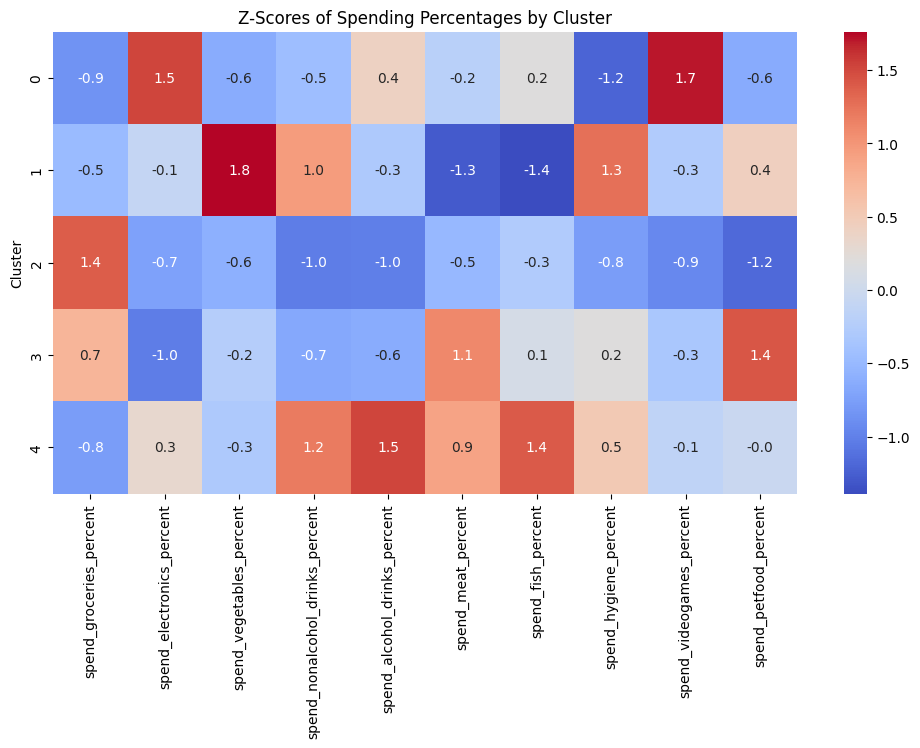

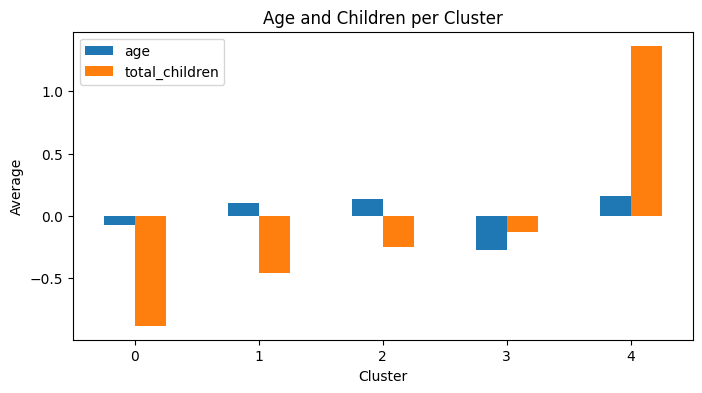

In [69]:
# ========== Step 1: Select Key Features ==========
demographics = ['age', 'total_children']
spending_percentages = [col for col in cluster_analysis.columns if 'spend_' in col and '_percent' in col]
engagement = ['number_complaints', 'distinct_stores_visited', 'loyalty_card']
shopping_behavior = ['morning_shopper', 'afternoon_shopper', 'evening_shopper']

key_features = demographics + spending_percentages + engagement + shopping_behavior

# ========== Step 2: Calculate Cluster-wise Summary ==========
cluster_summary = cluster_analysis.groupby('Cluster')[key_features].mean()
cluster_summary_std = cluster_analysis.groupby('Cluster')[key_features].std()

# Z-score comparison to detect what stands out per cluster
global_avg = cluster_analysis[key_features].mean()
z_scores = (cluster_summary - global_avg) / cluster_analysis[key_features].std()

# ========== Step 3: Automatic Cluster Naming ==========
def name_cluster(row, z_thresh=1.0):
    traits = []
    
    # Age group
    if row['age'] > global_avg['age'] + z_thresh:
        traits.append('Seniors')
    elif row['age'] < global_avg['age'] - z_thresh:
        traits.append('Youth')
    else:
        traits.append('Adults')
    
    # Shopping time
    if row['evening_shopper'] > global_avg['evening_shopper'] + z_thresh:
        traits.append('Evening Shoppers')
    elif row['morning_shopper'] > global_avg['morning_shopper'] + z_thresh:
        traits.append('Morning Shoppers')
    
    # Loyalty
    if row['loyalty_card'] > global_avg['loyalty_card'] + z_thresh:
        traits.append('Loyal Customers')
    if row['distinct_stores_visited'] > global_avg['distinct_stores_visited'] + z_thresh:
        traits.append('Multi-store Explorers')
    
    # Spending patterns
    top_spend = row[spending_percentages].sort_values(ascending=False).head(2).index
    for category in top_spend:
        name = category.replace("spend_", "").replace("_percent", "").replace("_", " ").title()
        traits.append(f"{name} Fans")
    
    return ", ".join(traits)

cluster_summary['auto_cluster_name'] = cluster_summary.apply(name_cluster, axis=1)
print("📌 Cluster Names:")
print(cluster_summary[['auto_cluster_name']])

# ========== Step 4: Visualization ==========
# 1. Radar Chart for Spending Percentages
def plot_radar_chart(cluster_num):
    labels = [col.replace('spend_', '').replace('_percent', '') for col in spending_percentages]
    stats = cluster_summary.loc[cluster_num, spending_percentages].values

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats, 'o-', linewidth=2, label=f'Cluster {cluster_num}')
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles), labels)
    ax.set_title(f"Cluster {cluster_num} Spend Profile")
    ax.grid(True)
    plt.show()

# 2. Heatmap of Z-scores
plt.figure(figsize=(12, 6))
sns.heatmap(z_scores[spending_percentages], cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Z-Scores of Spending Percentages by Cluster")
plt.show()

# 3. Age and Total Children Barplot
cluster_summary[['age', 'total_children']].plot(kind='bar', figsize=(8, 4))
plt.title("Age and Children per Cluster")
plt.ylabel("Average")
plt.xticks(rotation=0)
plt.show()

📌 Cluster Insights Based on Shopping Time, Stores Visited, and Complaints:

Cluster 0:
- Predominantly Evening Shoppers
- Tend to visit fewer stores

Cluster 1:
- Predominantly Afternoon Shoppers

Cluster 2:
- Low number of complaints

Cluster 3:
- High number of complaints

Cluster 4:
- Predominantly Morning Shoppers


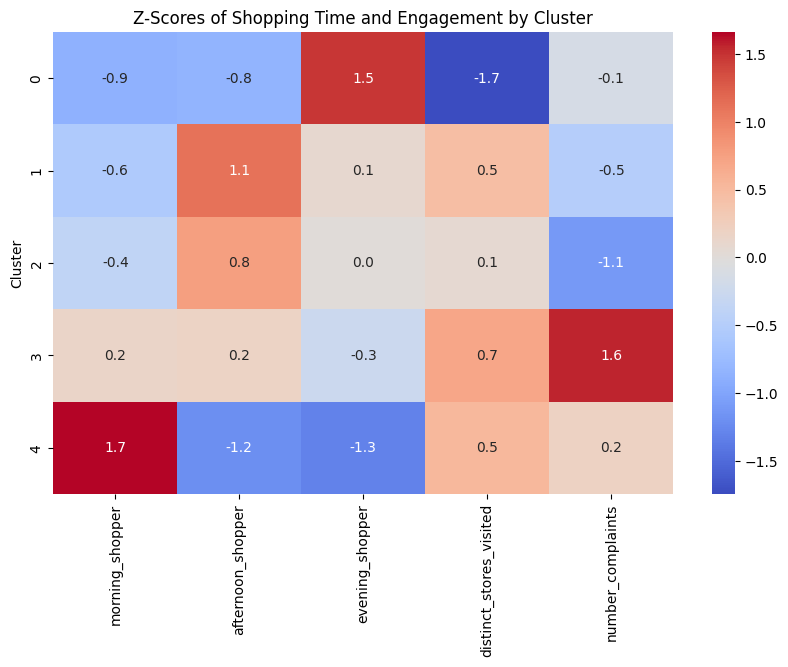

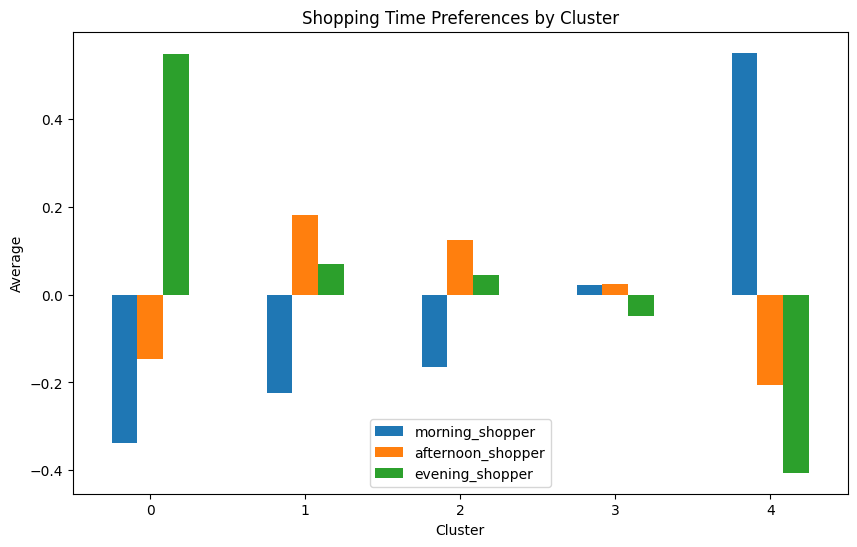

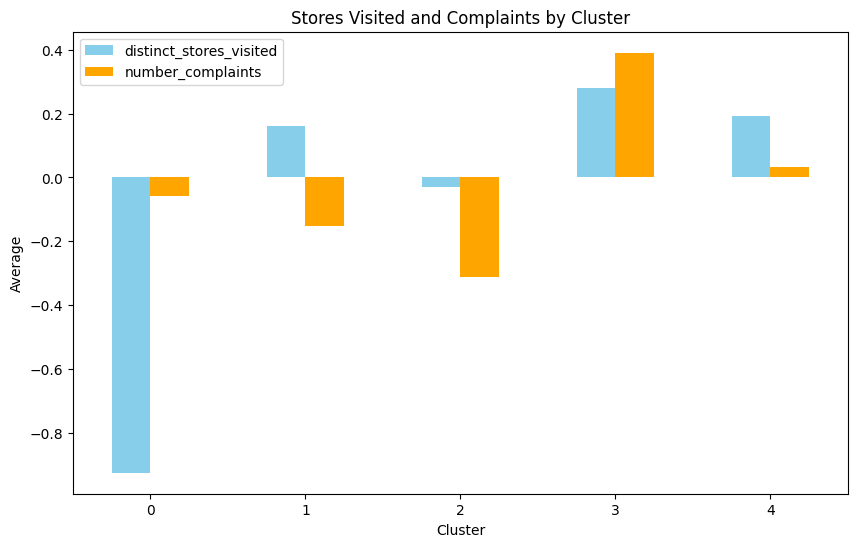

In [70]:
# ========== Insights for Clusters Based on Shopping Time, Stores Visited, and Complaints ==========

# Define the relevant features
time_features = ['morning_shopper', 'afternoon_shopper', 'evening_shopper']
engagement_features = ['distinct_stores_visited', 'number_complaints']

# Combine the features for analysis
analysis_features = time_features + engagement_features

# Calculate cluster-wise summary for the selected features
time_engagement_summary = cluster_analysis.groupby('Cluster')[analysis_features].mean()

# Z-score comparison to detect standout behaviors per cluster
global_avg_time_engagement = cluster_analysis[analysis_features].mean()
z_scores_time_engagement = (time_engagement_summary - global_avg_time_engagement) / cluster_analysis[analysis_features].std()

# ========== Insights ==========
print("📌 Cluster Insights Based on Shopping Time, Stores Visited, and Complaints:")
for cluster in time_engagement_summary.index:
    print(f"\nCluster {cluster}:")
    cluster_data = time_engagement_summary.loc[cluster]
    z_scores_data = z_scores_time_engagement.loc[cluster]
    
    # Shopping time preferences
    if z_scores_data['morning_shopper'] > 1.0:
        print("- Predominantly Morning Shoppers")
    elif z_scores_data['afternoon_shopper'] > 1.0:
        print("- Predominantly Afternoon Shoppers")
    elif z_scores_data['evening_shopper'] > 1.0:
        print("- Predominantly Evening Shoppers")
    
    # Stores visited
    if z_scores_data['distinct_stores_visited'] > 1.0:
        print("- Tend to visit multiple stores")
    elif z_scores_data['distinct_stores_visited'] < -1.0:
        print("- Tend to visit fewer stores")
    
    # Complaints
    if z_scores_data['number_complaints'] > 1.0:
        print("- High number of complaints")
    elif z_scores_data['number_complaints'] < -1.0:
        print("- Low number of complaints")

# ========== Visualization ==========
# Heatmap of Z-scores for Shopping Time and Engagement
plt.figure(figsize=(10, 6))
sns.heatmap(z_scores_time_engagement, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Z-Scores of Shopping Time and Engagement by Cluster")
plt.show()

# Barplot for Shopping Time Preferences
time_engagement_summary[time_features].plot(kind='bar', figsize=(10, 6))
plt.title("Shopping Time Preferences by Cluster")
plt.ylabel("Average")
plt.xticks(rotation=0)
plt.show()

# Barplot for Stores Visited and Complaints
time_engagement_summary[engagement_features].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Stores Visited and Complaints by Cluster")
plt.ylabel("Average")
plt.xticks(rotation=0)
plt.show()